### Nombre: Matías Jesús Egaña Alfaro. 
### Rut: 20.457.413-8. 
### Profesor: Humberto Farias Aroca.

### Desafíos 

Para profundizar su comprensión sobre cómo los diferentes parámetros y configuraciones afectan el rendimiento del modelo, complete los siguientes desafíos:

#### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento

El modelo actual se entrena durante 20 épocas. Intente cambiar el número de épocas de entrenamiento y observe cómo afecta el rendimiento del modelo.

1. Cambie el número de épocas a 10:


2. Cambie el número de épocas a 30:
 
**Pregunta:**
- ¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [3]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [4]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [5]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación ReLU
La función de activación ReLU (Rectified Linear Unit) es una de las funciones de activación más utilizadas en las redes neuronales debido a su simplicidad y efectividad. La ecuación de ReLU es:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que:

- Si $x$ es mayor que 0, ReLU devuelve $x$.
- Si $x$ es menor o igual a 0, ReLU devuelve 0.

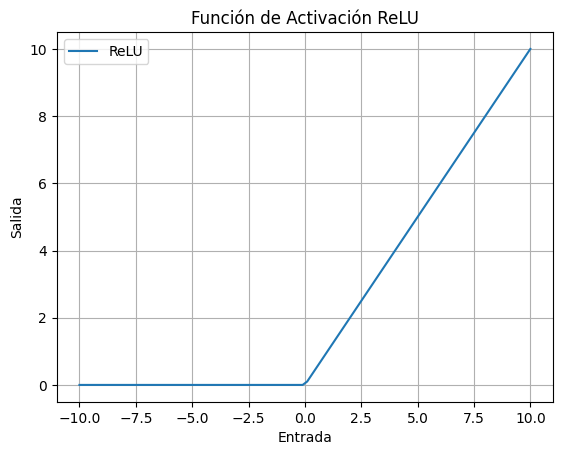

In [6]:
# Definición de la función ReLU
def relu(x):
    return np.maximum(0, x)

# Generar datos para la gráfica
x = np.linspace(-10, 10, 100)
y = relu(x)

# Graficar la función ReLU
plt.plot(x, y, label='ReLU')
plt.title('Función de Activación ReLU')
plt.xlabel('Entrada')
plt.ylabel('Salida')
plt.legend()
plt.grid()
plt.show()

## Construcción del modelo

In [7]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dense(10, activation='relu'))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida con 3 neuronas (una por clase) y función de activación softmax

# Resumen del modelo
model.summary()

C:\Users\Mati\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

## Función de Pérdida `categorical_crossentropy`
La función de pérdida `categorical_crossentropy` se utiliza para problemas de clasificación multiclase. Mide la discrepancia entre dos distribuciones de probabilidad: la distribución real (etiquetas verdaderas) y la distribución predicha por el modelo. La ecuación es:

$$
\text{Categorical Crossentropy} = -\sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$

Donde:
- $y_i$ es la etiqueta verdadera para la clase $i$.
- $\hat{y}_i$ es la probabilidad predicha por el modelo para la clase $i$.
- $N$ es el número total de clases.

La función de pérdida es mínima cuando las distribuciones real y predicha son idénticas, lo que significa que el modelo ha hecho predicciones perfectas.

### Gráfico de la Función de Pérdida `categorical_crossentropy`

Para visualizar cómo cambia la pérdida `categorical_crossentropy`, podemos graficar la pérdida en función de las probabilidades predichas para un conjunto de etiquetas verdaderas.


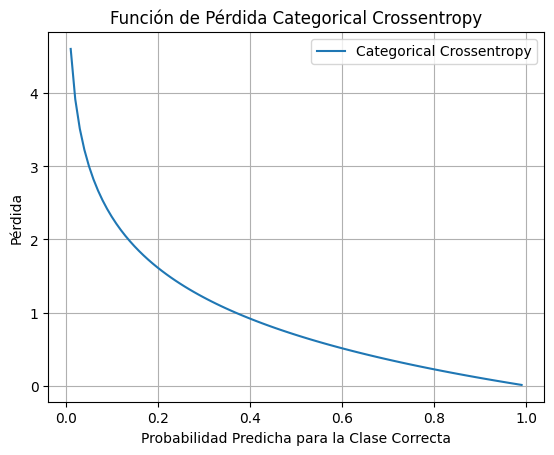

In [8]:

# Definición de la función de pérdida categorical_crossentropy
def categorical_crossentropy(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred))

# Generar datos para la gráfica
y_true = np.array([0, 0, 1])  # Etiqueta verdadera (one-hot encoding)
y_pred = np.linspace(0.01, 0.99, 100)  # Probabilidades predichas (varían de 0.01 a 0.99)
loss = [categorical_crossentropy(y_true, [1 - p - 0.01, 0.01, p]) for p in y_pred]

# Graficar la función de pérdida categorical_crossentropy
plt.plot(y_pred, loss, label='Categorical Crossentropy')
plt.title('Función de Pérdida Categorical Crossentropy')
plt.xlabel('Probabilidad Predicha para la Clase Correcta')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [9]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3500 - loss: 1.8817 - val_accuracy: 0.4167 - val_loss: 1.2641
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2922 - loss: 1.4395 - val_accuracy: 0.4167 - val_loss: 1.0686
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2644 - loss: 1.1786 - val_accuracy: 0.5000 - val_loss: 0.9597
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.8980 - val_accuracy: 0.6667 - val_loss: 0.8261
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.7641 - val_accuracy: 1.0000 - val_loss: 0.7466
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.6567 - val_accuracy: 1.0000 - val_loss: 0.6824
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.6483 - val_accuracy: 1.0000 - val_loss: 0.6376
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9109 - loss: 0.5396 - val_accuracy: 1.0000 - val_loss:

In [11]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9667 - loss: 0.2819
Precisión en el conjunto de prueba: 96.67%


In [12]:
# Guardar el modelo
model.save('mlp_model_30.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_30.h5')


## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


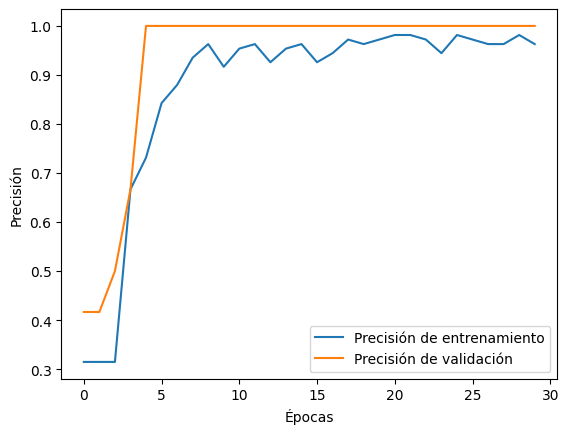

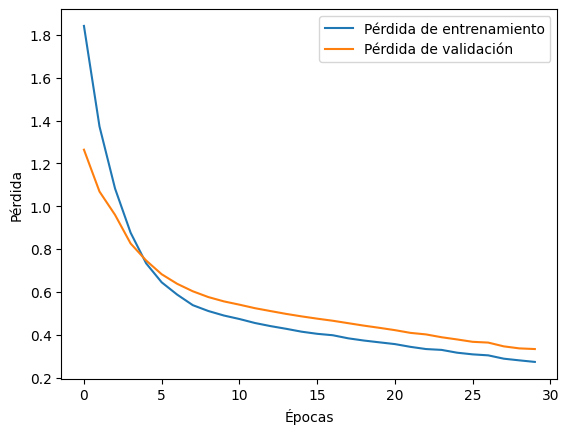

In [13]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


#### ¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?
- Epoch (10): Puede no ser suficiente para que el modelo aprenda adecuadamente, llevando a subajuste, donde tanto la precisión como la pérdida no alcanzan su potencial óptimo en entrenamiento y validación.
- Epoch (30): Da más tiempo para que el modelo aprenda y ajuste sus pesos, lo que puede mejorar la precisión y reducir la pérdida si el modelo estaba subajustado. Sin embargo, un número excesivo de épocas puede llevar a sobreajuste, visible cuando la precisión de entrenamiento sigue mejorando mientras que la precisión de validación disminuye o se estanca.